In [1]:
# Install statements
# install.packages(c("remotes","pROC","naivebayes"))
# remotes::install_github("jtextor/bayesianNetworks")
# install.packages("bnlearn")
# install.packages("dagitty")
# install.packages("lavaan")

In [2]:
# Packages

library( bayesianNetworks )
library( naivebayes )
library( bnlearn )
library( dagitty )
library( lavaan )

# Packages for train and test set splitting (balanced)

library(alookr)
library(dplyr)

Warning message:
"package 'naivebayes' was built under R version 3.6.3"naivebayes 0.9.7 loaded
Warning message:
"package 'bnlearn' was built under R version 3.6.3"Warning message:
"package 'dagitty' was built under R version 3.6.3"
Attaching package: 'dagitty'

The following objects are masked from 'package:bnlearn':

    ancestors, children, descendants, parents, spouses

Warning message:
"package 'lavaan' was built under R version 3.6.3"This is lavaan 0.6-7
lavaan is BETA software! Please report any bugs.
Warning message:
"package 'alookr' was built under R version 3.6.3"Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: randomForest
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

Registered S3 method overwritt

In [3]:
# Read in the .csv that was created during the preprocessing

df <- read.csv('Datasets/Dataset_Prediction.csv')

# Visually inspect the dataframe

head(df)

Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth
35-44,0,Professional certificate/ diploma,39,36,42,37,42,0.1883,0.0700,6,0,0
25-34,1,Doctorate degree,29,52,55,48,41,0.1629,0.1183,6,4,3
35-44,1,Professional certificate/ diploma,31,45,40,32,34,0.1464,0.1321,6,3,0
18-24,0,Masters degree,34,34,46,47,46,0.1464,0.0700,5,2,0
35-44,0,Doctorate degree,43,28,43,41,50,0.1883,0.1183,6,3,0
65+,0,Left school at 18,29,38,35,55,52,0.1464,0.0462,6,0,0


In [4]:
# Transforming the non numerical ordinal values to numerical values with ordering

# BNLearn wants all data to be a double so we will transform all data to doubles 

df$Caffeine <- as.double( ordered(df$Caffeine, levels =c("0","1","2","3","4","5","6")))
df$Cannabis <- as.double( ordered(df$Cannabis, levels =c("0","1","2","3","4","5","6")))
df$Meth <- as.double( ordered(df$Meth, levels =c("0","1","2","3","4","5","6")))
df$Age <- as.double( ordered(df$Age, levels =c("18-24","25-34","35-44","45-54","55-64","65+")))
df$Education <- as.double( ordered(df$Education, levels=c("Left school before 16","Left school at 16","Left school at 17","Left school at 18","College or university dropout","Professional certificate/ diploma","University degree","Masters degree","Doctorate degree")))

In [5]:
# BNLearn wants all data to be a double so we will transform all data to doubles 

df$Gender <- as.double(df$Gender) 
df$Nscore <- as.double(df$Nscore) 
df$Escore <- as.double(df$Escore) 
df$Oscore <- as.double(df$Oscore) 
df$Ascore <- as.double(df$Ascore) 
df$Cscore <- as.double(df$Cscore) 

# Confirm that all variables are succesfully transformed into doubles
str(df)

'data.frame':	1885 obs. of  13 variables:
 $ Age              : num  3 2 3 1 3 6 4 3 3 5 ...
 $ Gender           : num  0 1 1 0 0 0 1 1 0 1 ...
 $ Education        : num  6 9 6 8 9 4 8 2 6 8 ...
 $ Nscore           : num  39 29 31 34 43 29 31 24 42 33 ...
 $ Escore           : num  36 52 45 34 28 38 32 52 55 40 ...
 $ Oscore           : num  42 55 40 46 43 35 43 40 39 36 ...
 $ Ascore           : num  37 48 32 47 41 55 41 41 48 47 ...
 $ Cscore           : num  42 41 34 46 50 52 48 52 49 43 ...
 $ Impulsive        : num  0.188 0.163 0.146 0.146 0.188 ...
 $ Sensation_seeking: num  0.07 0.118 0.132 0.07 0.118 ...
 $ Caffeine         : num  7 7 7 6 7 7 7 7 7 7 ...
 $ Cannabis         : num  1 5 4 3 4 1 2 1 1 2 ...
 $ Meth             : num  1 4 1 1 1 1 1 1 1 1 ...


In [6]:
# Inspecting the unique values of all the variables (note that R does no allow counting from 0 so all the levels of the labels are shifted +1)

print("age")
unique(df$Age)
print("gender")
unique(df$Gender)
print("education")
unique(df$Education)
print("Nscore")
unique(df$Nscore)
print("Escore")
unique(df$Escore)
print("Cscore")
unique(df$Cscore)
print("Impulsive")
unique(df$Impulsive)
print("Sensation_seeking")
unique(df$Sensation_seeking)
print("Caffeine")
unique(df$Caffeine)
print("Cannabis")
unique(df$Cannabis)
print("Meth")
unique(df$Meth)

[1] "age"


[1] 3 2 1 6 4 5

[1] "gender"


[1] 0 1

[1] "education"


[1] 6 9 8 4 2 7 5 1 3

[1] "Nscore"


[1] 39 29 31 34 43 24 42 33 26 56 28 27 19 22 41 49 32 25 40 51 35 36 46 44 37
[26] 47 23 30 38 18 45 17 53 50 60 21 54 59 48 20 55 16 57 52 58 14 15 13 12

[1] "Escore"


[1] 36 52 45 34 28 38 32 55 40 41 49 29 31 39 27 43 33 16 44 37 51 42 48 46 47
[26] 35 50 30 26 58 53 54 23 22 24 19 20 21 25 56 59 18

[1] "Cscore"


[1] 42 41 34 46 50 52 48 49 43 53 38 36 59 47 31 30 33 35 51 25 37 45 39 44 27
[26] 40 29 54 55 32 56 20 28 26 22 24 23 19 17 21 57

[1] "Impulsive"


[1] 0.1883 0.1629 0.1464 0.1363 0.1146 0.0785 0.0552 0.0106 0.1034 0.0037

[1] "Sensation_seeking"


[1] 0.0700 0.1183 0.1321 0.0462 0.1162 0.1119 0.0897 0.1114 0.0377 0.0546

[1] "Caffeine"


[1] 7 6 5 4 1 2 3

[1] "Cannabis"


[1] 1 5 4 3 2 7 6

[1] "Meth"


[1] 1 4 2 7 5 3 6

In [7]:
# Split our data into a training and testing set to be able to test how well it generalizes on unseen data

# The balancing is done upon the Meth variable because that is the variable that shows a problematic class imbalance

sb <- df %>% 
  split_by(Meth, seed = 112233) # set the seed to make our split partition reproducible

# Inspect the new dataframe (note the new column)

head(sb)

# Split up this new dataframe into a train and test set based upon their flags

train <- sb %>%
  extract_set(set = "train")

test <- sb %>%
  extract_set(set = "test")

# Inspect both sets

head(train)

head(test)

summary(sb)

Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth,split_flag
3,0,6,39,36,42,37,42,0.1883,0.0700,7,1,1,test
2,1,9,29,52,55,48,41,0.1629,0.1183,7,5,4,train
3,1,6,31,45,40,32,34,0.1464,0.1321,7,4,1,train
1,0,8,34,34,46,47,46,0.1464,0.0700,6,3,1,train
3,0,9,43,28,43,41,50,0.1883,0.1183,7,4,1,train
6,0,4,29,38,35,55,52,0.1464,0.0462,7,1,1,train


Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth
2,1,9,29,52,55,48,41,0.1629,0.1183,7,5,4
3,1,6,31,45,40,32,34,0.1464,0.1321,7,4,1
1,0,8,34,34,46,47,46,0.1464,0.0700,6,3,1
3,0,9,43,28,43,41,50,0.1883,0.1183,7,4,1
6,0,4,29,38,35,55,52,0.1464,0.0462,7,1,1
4,1,8,31,32,43,41,48,0.1883,0.1162,7,2,1


Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth
3,0,6,39,36,42,37,42,0.1883,0.0700,7,1,1
5,1,8,33,40,36,47,43,0.1464,0.0897,7,2,1
5,0,7,56,41,49,32,36,0.0785,0.1162,7,4,2
5,0,6,27,49,49,39,52,0.0785,0.1119,7,1,1
4,1,2,41,31,44,40,31,0.1464,0.0897,7,7,1
5,1,7,49,39,45,30,30,0.1629,0.1183,7,4,1


** Split train/test set information **
 + random seed        :  112233 
 + split data            
    - train set count :  1320 
    - test set count  :  565 
 + target variable    :  Meth 
    - minority class  :  2 (0.020690)
    - majority class  :  1 (0.758090)


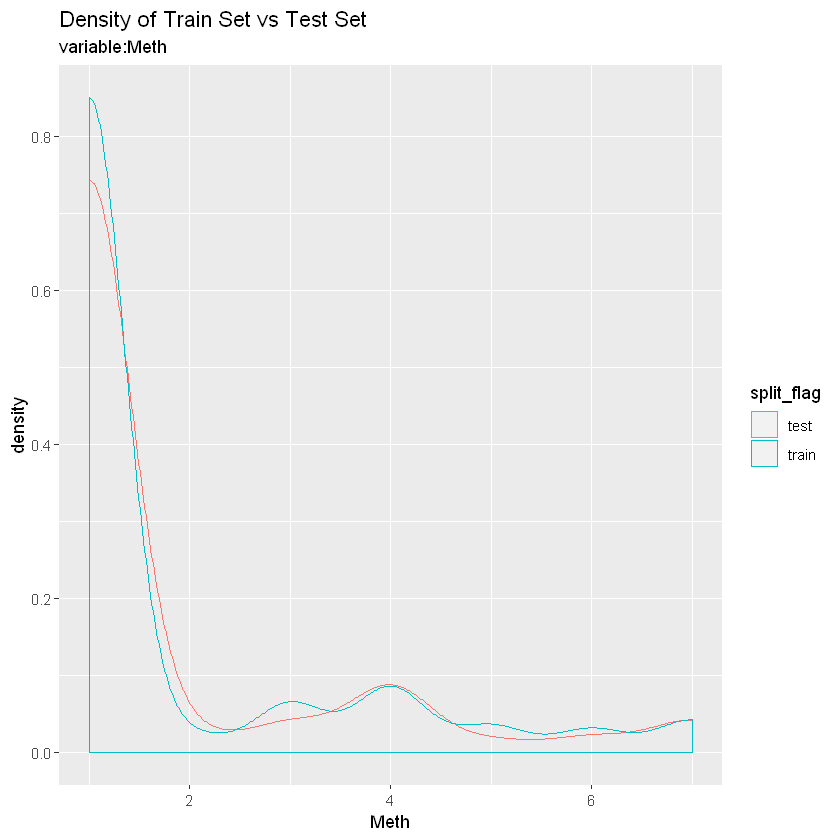

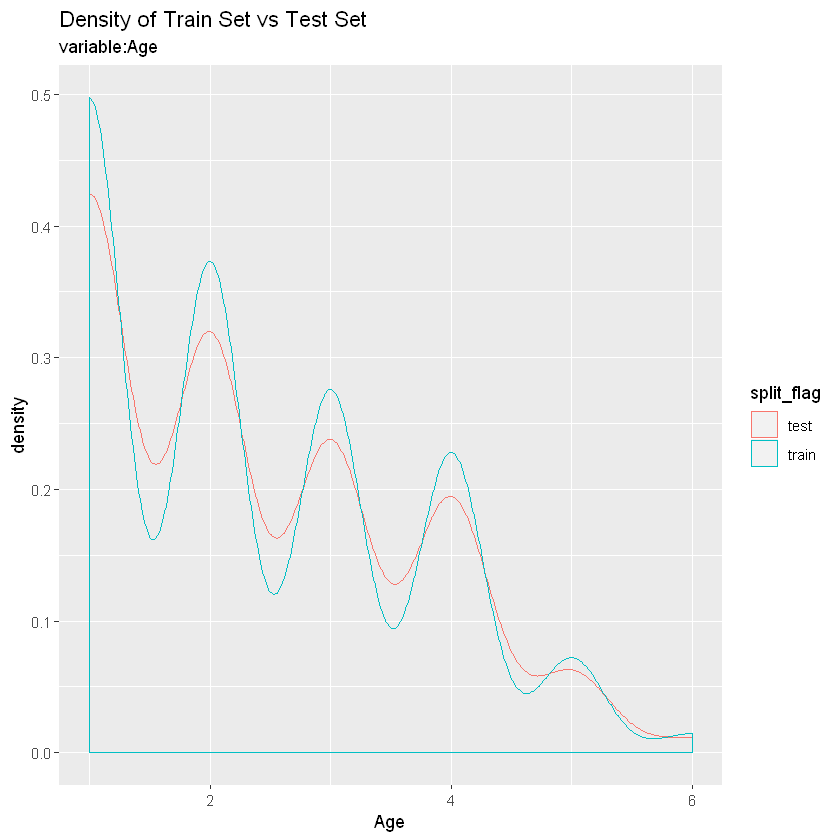

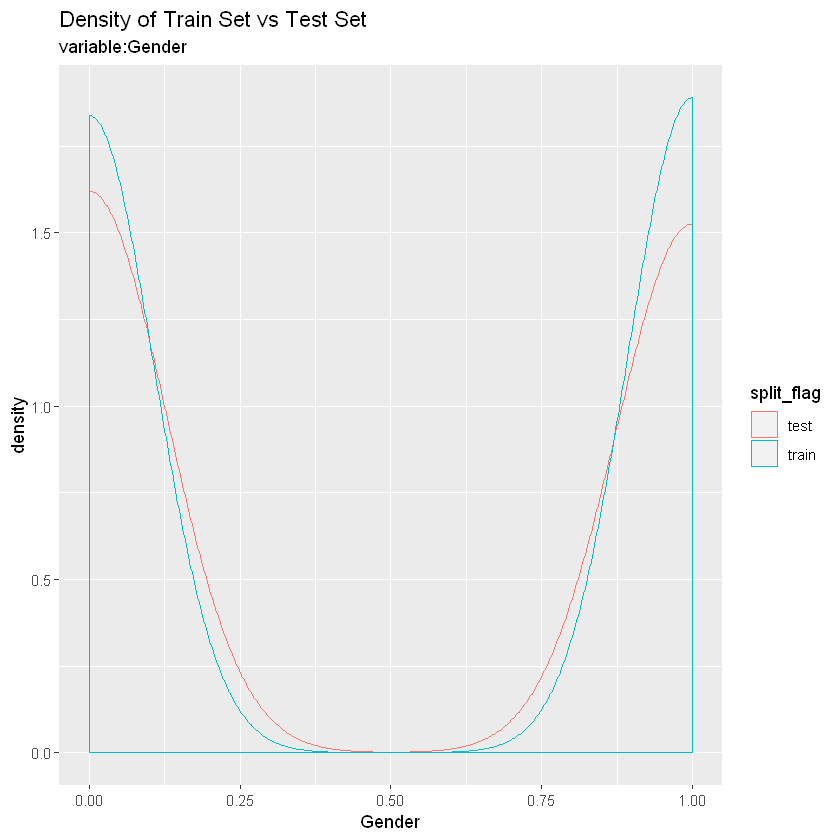

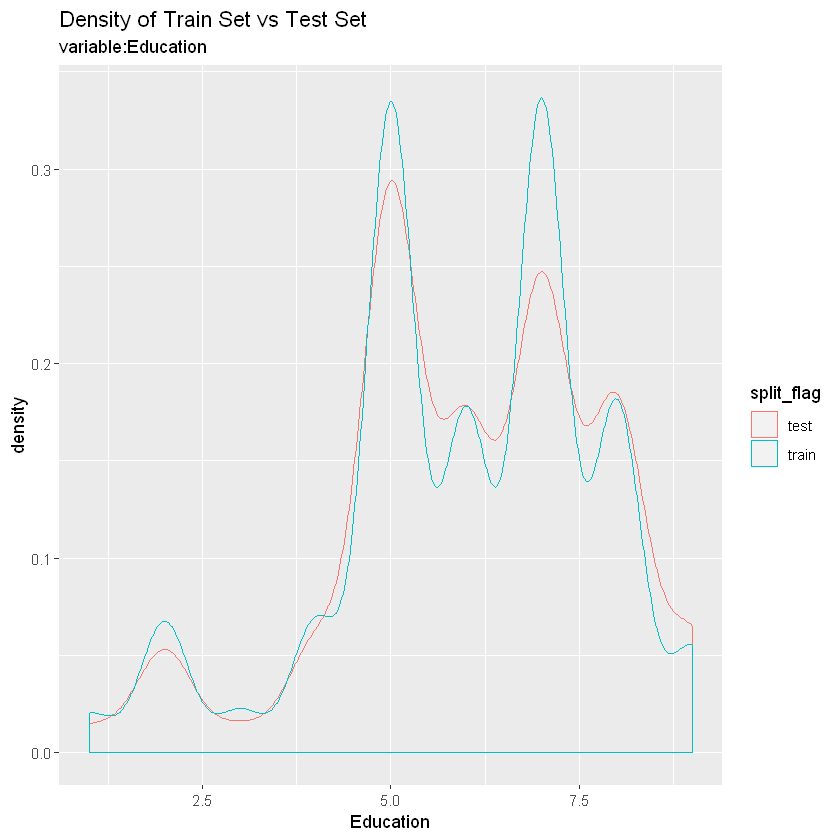

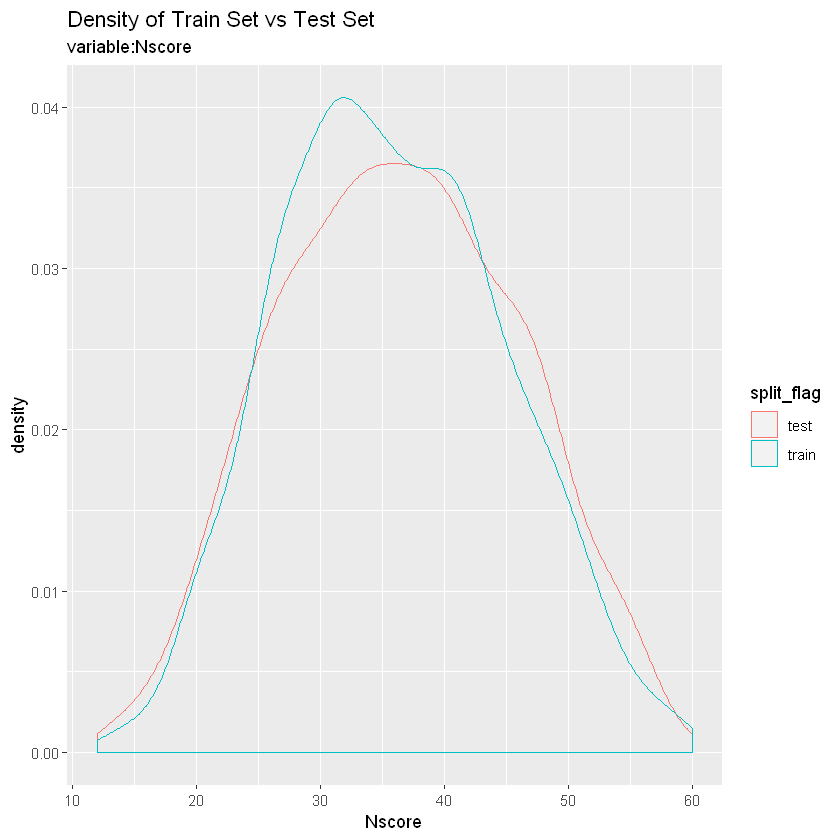

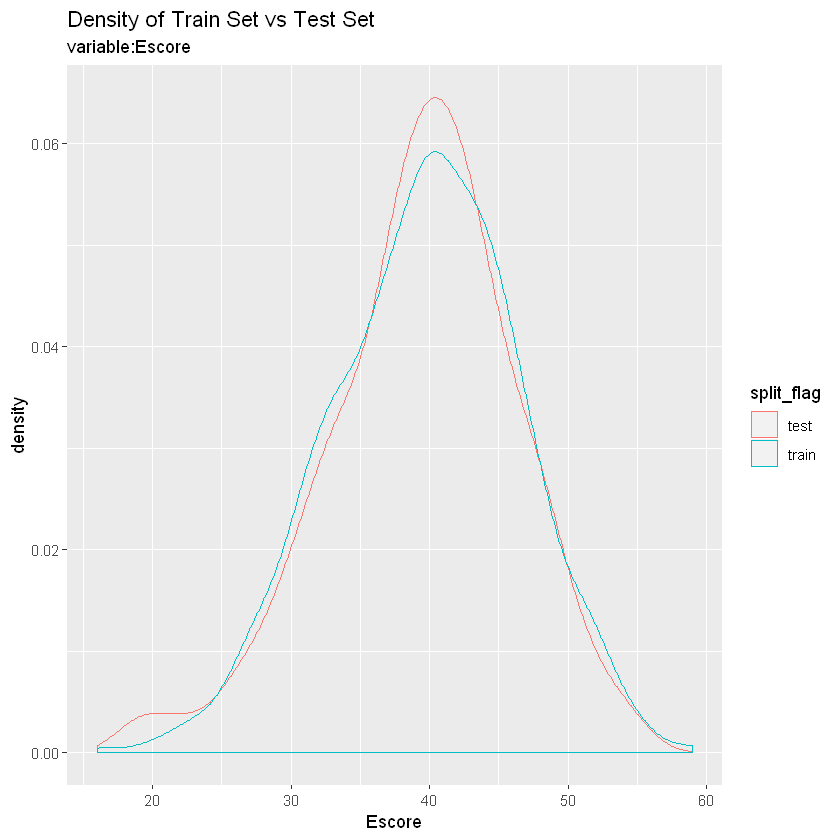

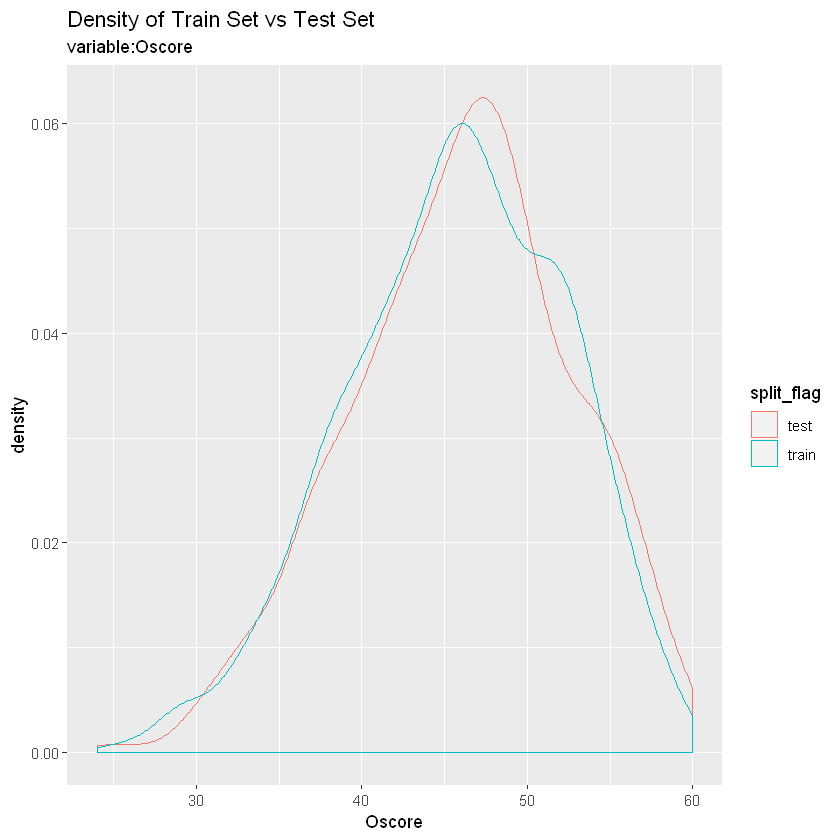

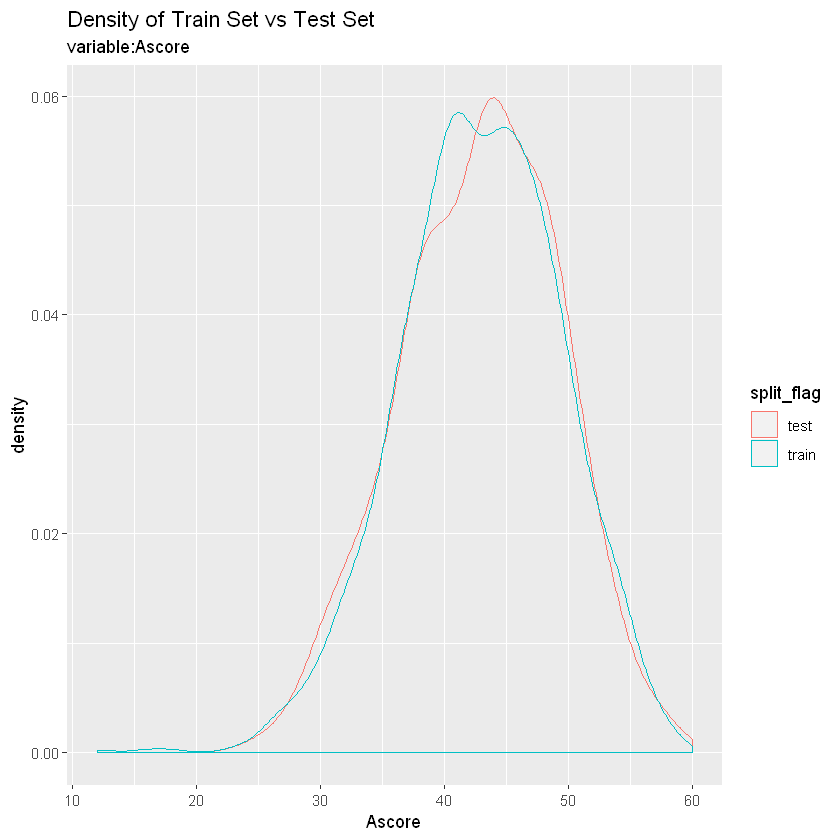

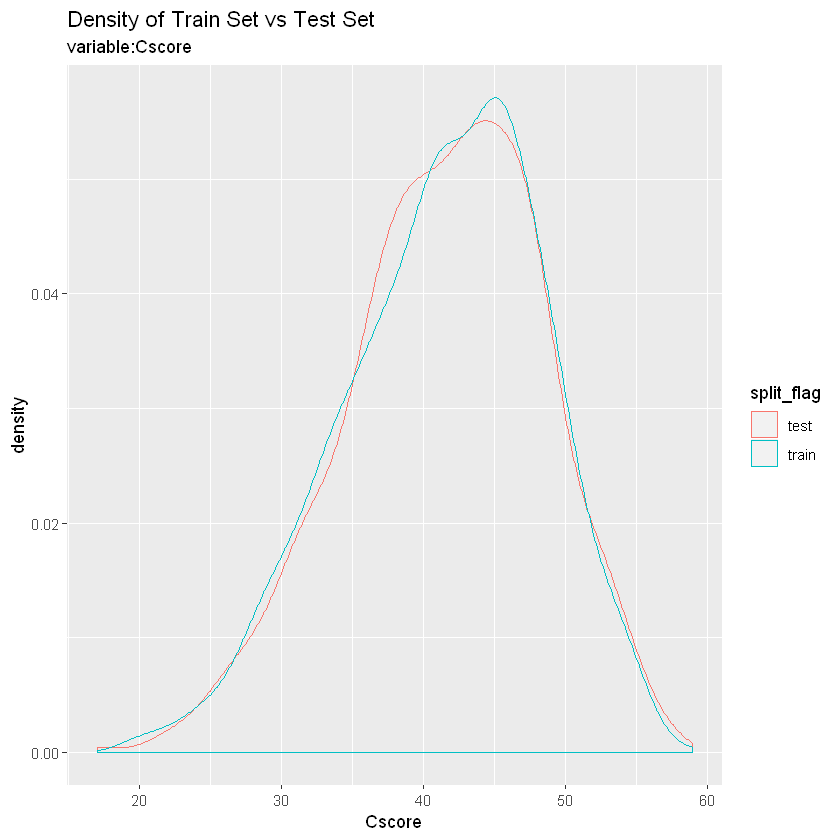

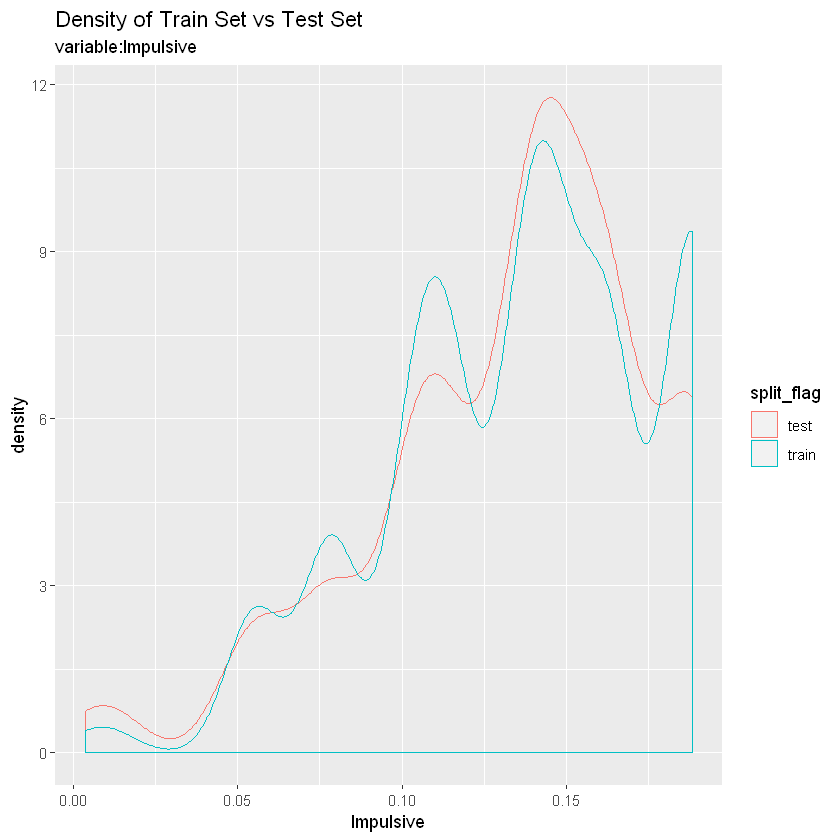

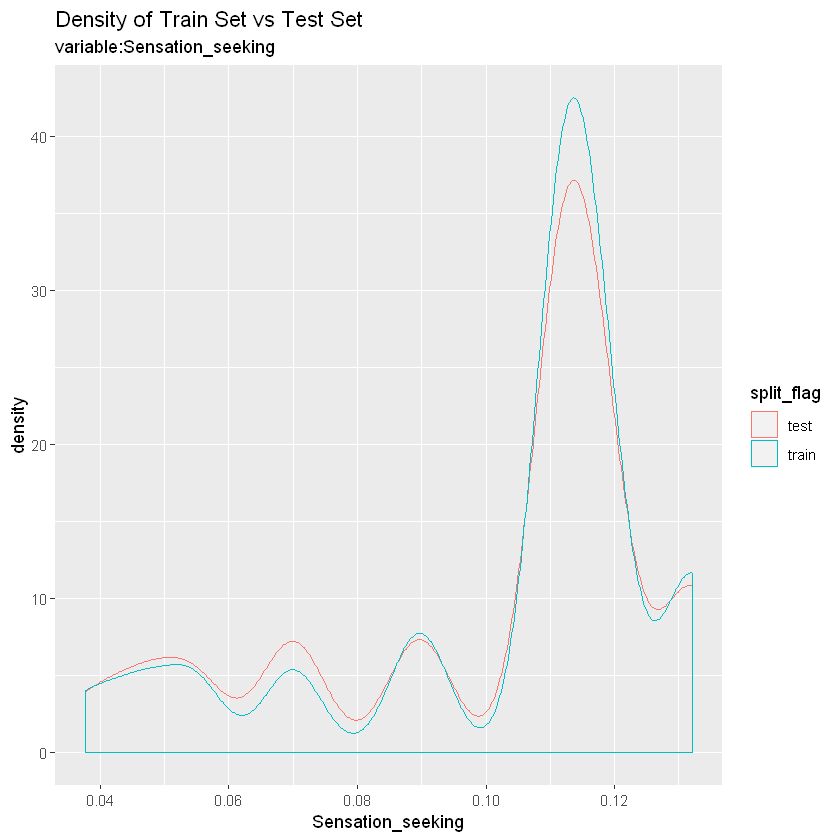

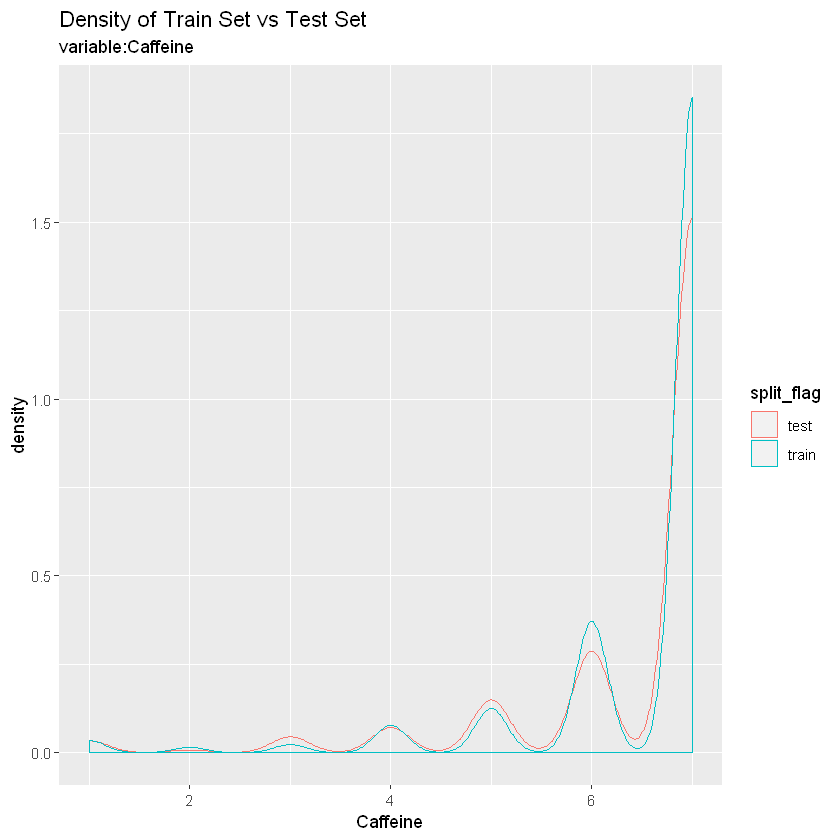

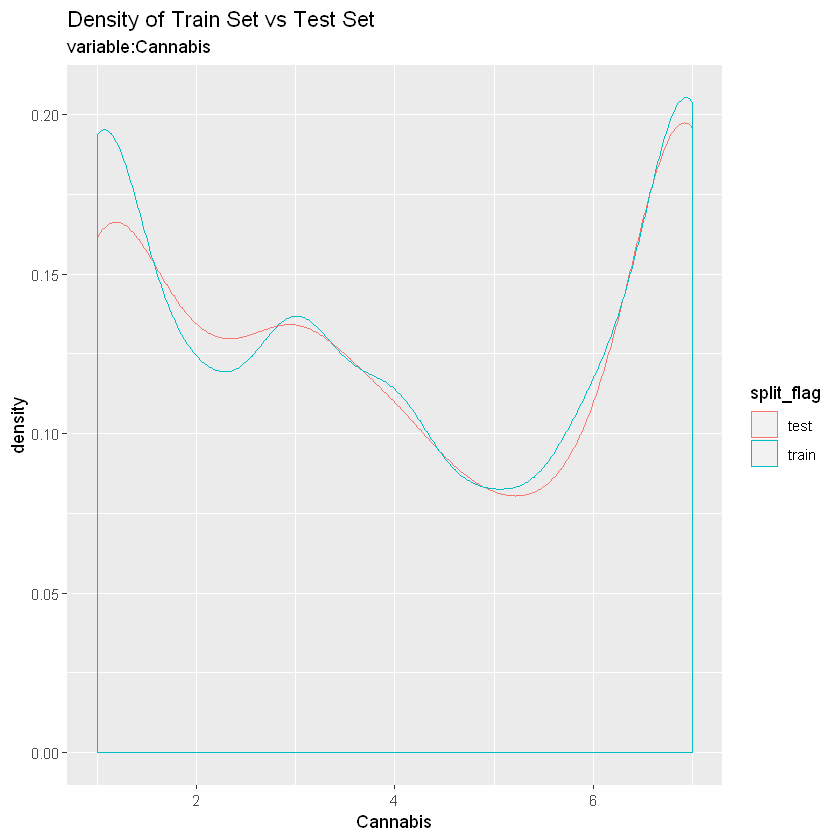

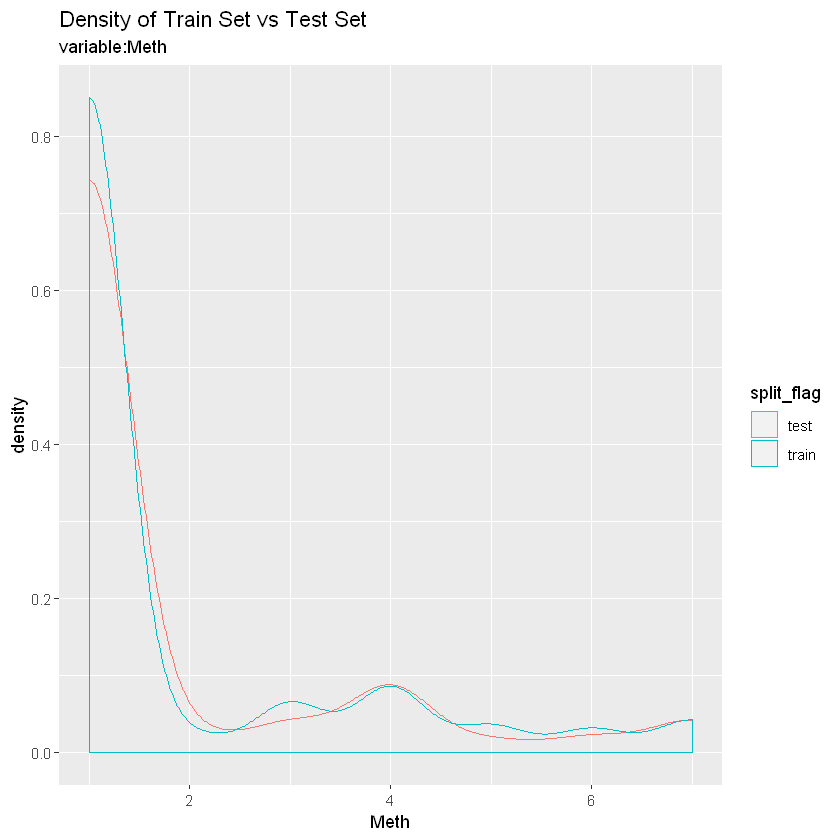

In [8]:
# Visually compare/verify the result of the balanced split

sb %>%
  compare_plot("Meth")

sb %>%
  compare_plot()

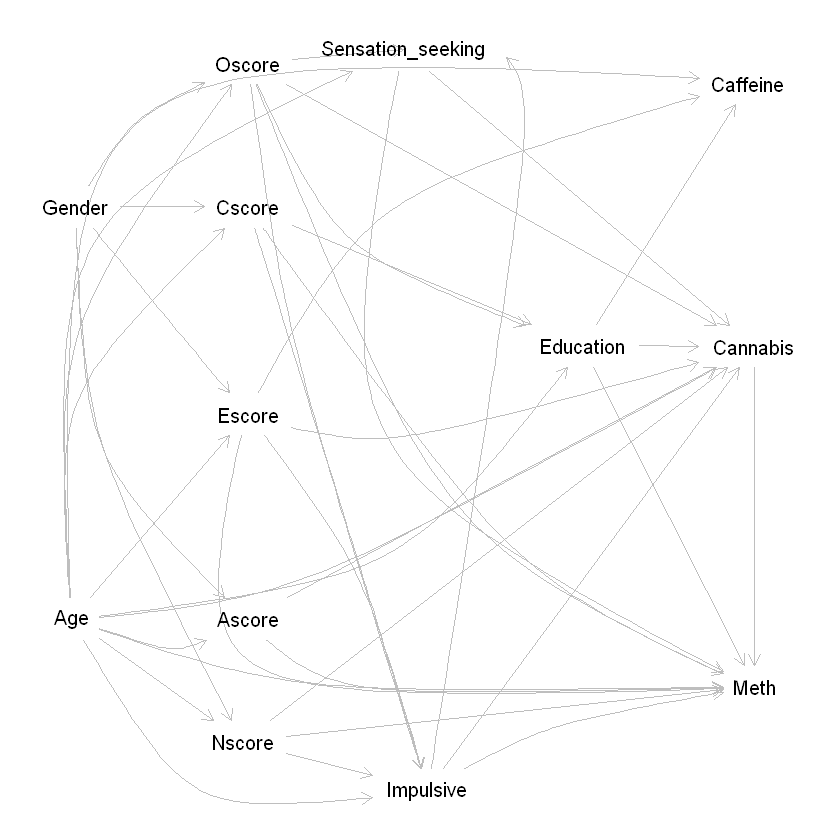

In [9]:
# Creating and plotting the DAG

graph <- dagitty('dag {
bb="0,0,1,1"
Age [pos="0.070,0.753"]
Ascore [pos="0.270,0.753"]
Caffeine [pos="0.839,0.112"]
Cannabis [pos="0.846,0.427"]
Cscore [pos="0.270,0.260"]
Education [pos="0.650,0.426"]
Escore [pos="0.270,0.508"]
Gender [pos="0.074,0.260"]
Impulsive [pos="0.474,0.958"]
Meth [pos="0.846,0.834"]
Nscore [pos="0.264,0.900"]
Oscore [pos="0.270,0.088"]
Sensation_seeking [pos="0.447,0.072"]
Age -> Ascore [pos="0.188,0.797"]
Age -> Caffeine [pos="0.010,0.025"]
Age -> Cannabis [pos="0.311,0.741"]
Age -> Cscore [pos="0.039,0.480"]
Age -> Education [pos="0.458,0.713"]
Age -> Escore
Age -> Impulsive [pos="0.196,0.999"]
Age -> Meth [pos="0.302,0.847"]
Age -> Nscore
Age -> Oscore [pos="0.036,0.406"]
Age -> Sensation_seeking [pos="0.024,0.257"]
Ascore -> Cannabis
Ascore -> Meth [pos="0.350,0.851"]
Cannabis -> Meth
Cscore -> Education
Cscore -> Impulsive [pos="0.420,0.769"]
Cscore -> Meth [pos="0.577,0.720"]
Education -> Caffeine
Education -> Cannabis
Education -> Meth
Escore -> Caffeine [pos="0.393,0.237"]
Escore -> Cannabis [pos="0.416,0.556"]
Escore -> Impulsive [pos="0.404,0.691"]
Escore -> Meth [pos="0.158,0.875"]
Gender -> Ascore [pos="0.077,0.567"]
Gender -> Cscore
Gender -> Escore [pos="0.199,0.421"]
Gender -> Nscore [pos="0.077,0.534"]
Gender -> Oscore [pos="0.137,0.151"]
Impulsive -> Cannabis
Impulsive -> Meth [pos="0.603,0.879"]
Impulsive -> Sensation_seeking [pos="0.609,0.085"]
Nscore -> Cannabis
Nscore -> Impulsive
Nscore -> Meth
Oscore -> Cannabis
Oscore -> Education [pos="0.364,0.319"]
Oscore -> Impulsive [pos="0.305,0.395"]
Oscore -> Meth [pos="0.480,0.679"]
Oscore -> Sensation_seeking
Sensation_seeking -> Cannabis
Sensation_seeking -> Meth [pos="0.329,0.574"]
}
')

plot(graph)

In [10]:
# Fitting the network on our training dataset

network <- model2network(toString(graph,"bnlearn"))
fit <- bn.fit(network, as.data.frame(scale(train)))

# Inspecting our fit

fit


  Bayesian network parameters

  Parameters of node Age (Gaussian distribution)

Conditional density: Age
Coefficients:
  (Intercept)  
-1.127465e-16  
Standard deviation of the residuals: 1 

  Parameters of node Ascore (Gaussian distribution)

Conditional density: Ascore | Age + Gender
Coefficients:
  (Intercept)            Age         Gender  
-2.411041e-16   4.975173e-02  -2.097066e-01  
Standard deviation of the residuals: 0.9761595 

  Parameters of node Caffeine (Gaussian distribution)

Conditional density: Caffeine | Age + Education + Escore
Coefficients:
  (Intercept)            Age      Education         Escore  
-2.165916e-17   2.186888e-02   8.037852e-03   3.808936e-02  
Standard deviation of the residuals: 1.000125 

  Parameters of node Cannabis (Gaussian distribution)

Conditional density: Cannabis | Age + Ascore + Education + Escore + Impulsive + Nscore + Oscore + Sensation_seeking
Coefficients:
      (Intercept)                Age             Ascore          Education

In [11]:
# Predicting on the testing dataset with our fitted model (Cannabis)

pred <- predict(fit,node="Cannabis", data=test,method="bayes-lw")

accuracy <- mean(test$Cannabis - pred)
print("Average accuracy with entire network:")
accuracy

pred_parents <- predict(fit,node="Cannabis", data=test)

accuracy_par <- mean(test$Cannabis - pred_parents)
print("Average accuracy with only parents:")
accuracy_par

[1] "Average accuracy with entire network:"


[1] 0.313031

[1] "Average accuracy with only parents:"


[1] 0.2609616

In [12]:
# Predicting on the testing dataset with our fitted model (Meth)

pred <- predict(fit,node="Meth", data=test,method="bayes-lw")

accuracy <- mean(test$Meth - pred)
print("Average accuracy with entire network:")
accuracy

pred_parents <- predict(fit,node="Meth", data=test)

accuracy_par <- mean(test$Meth - pred_parents)
print("Average accuracy with only parents:")
accuracy_par

[1] "Average accuracy with entire network:"


[1] -0.4355925

[1] "Average accuracy with only parents:"


[1] -0.4344206

In [13]:
# Predicting on the testing dataset with our fitted model (Caffeine)

pred <- predict(fit,node="Caffeine", data=test,method="bayes-lw")

accuracy <- mean(test$Caffeine - pred)
print("Average accuracy with entire network:")
accuracy

pred_parents <- predict(fit,node="Caffeine", data=test)

accuracy_par <- mean(test$Caffeine - pred_parents)
print("Average accuracy with only parents:")
accuracy_par

[1] "Average accuracy with entire network:"


[1] 4.82325

[1] "Average accuracy with only parents:"


[1] 4.822238

| Iteration 	| Cannabis 	|         	|            	| Meth     	|         	|            	| Caffeine 	|          	|            	|
|-----------	|----------	|---------	|------------	|----------	|---------	|------------	|----------	|----------	|------------	|
|           	| Bayes-lw 	| Parents 	| difference 	| Bayes-lw 	| Parents 	| difference 	| Bayes-lw 	| Parents  	| difference 	|
| 1         	| 0.3398   	| 0.2384  	| 0.1014     	| 0.8022   	| 0.8044  	| 0.0023     	| 3.3551   	| 3.3550   	| 0.0001     	|
| 2         	| 2.2785   	| 2.0826  	| 0.1959     	| 2.2299   	| 2.2307  	| 0.0009     	| 4.1527   	| 4.1538   	| 0.0011     	|
| 3         	| 0.0691   	| 0.2682  	| 0.1991     	| 2.6248   	| 2.6253  	| 0.0005     	| 2.3223   	| 2.3193   	| 0.0030     	|
| 4         	| 1.1156   	| 1.1077  	| 0.0079     	| 0.2691   	| 0.2694  	| 0.0003     	| 3.8567   	| 3.8557   	| 0.0010     	|
| 5         	| 1.5186   	| 1.5396  	| 0.0210     	| 0.0561   	| 0.0586  	| 0.0024     	| 3.7316   	| 3.7315   	| 0.0001     	|
| 6         	| 1.3261   	| 1.0215  	| 0.3046     	| 2.5442   	| 2.5440  	| 0.0002     	| 4.0237   	| 4.0212   	| 0.0025     	|
| 7         	| 0.3372   	| 0.5588  	| 0.2216     	| 2.0849   	| 2.0848  	| 0.0001     	| 3.7084   	| 3.7085   	| 0.0001     	|
| 8         	| 1.5067   	| 1.3822  	| 0.1245     	| 1.2249   	| 1.2284  	| 0.0035     	| 3.9368   	| 3.9364   	| 0.0004     	|
| 9         	| 0.3057   	| 0.1734  	| 0.1322     	| 1.1332   	| 1.1360  	| 0.0029     	| 3.4502   	| 3.4492   	| 0.0010     	|
| 10        	| 0.3140   	| 0.2610  	| 0.0530     	| 0.4330   	| 0.4344  	| 0.0014     	| 4.8233   	| 4.8222   	| 0.0010     	|
| Mean      	| 0.9775   	| 0.9303  	| 0.1454     	| 1.4410   	| 1.4424  	| 0.0014     	| 3.6153   	| 3.6145   	| 0.0010     	|

Since the accuracies varied per random initialization of the train and test split, 10 random initializations were used to calculate a final score. Absolute difference is used for calculations.